# Assignment- Sampling
by Amrita Bhatia<br>
Roll no. 102017017

## Importing libraries and data

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [246]:
df = pd.read_csv("Creditcard_data.csv")

In [247]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [248]:
df.shape

(772, 31)

In [249]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [250]:
df.isna().sum().sum()

0

<Axes: >

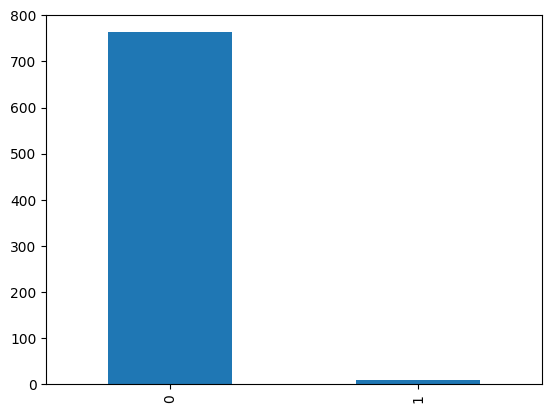

In [251]:
df['Class'].value_counts().plot.bar()

In [252]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

## Imbalanced data handling

In [253]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [254]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [255]:
df_balanced = pd.DataFrame(x_smote)
df_balanced['Class'] = y_smote

## Sampling Methods

### Simple Random Sampling (w/o replacement)

In [256]:
Z = 1.96
p = 0.5
E = 0.05

sample_size = int(np.ceil((Z**2 * p * (1 - p))/(E**2)))
print('Sample size:', sample_size)

Sample size: 385


In [257]:
random_sample = df_balanced.sample(n=sample_size, random_state=17)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
921,163,0.074739,0.550716,0.451573,0.115334,0.822099,0.251109,0.295902,0.139436,-0.123197,...,-0.128866,-0.382218,0.150956,-1.362829,-1.387350,0.075468,0.231482,0.229932,0.991889,1
971,142,0.628608,0.456709,0.381691,0.386619,0.261727,-0.369563,0.197863,-0.021355,-0.048715,...,-0.203389,-0.593726,0.140238,-0.563595,-0.634928,0.084477,0.111884,0.136536,1.788778,1
1052,523,0.036063,0.383437,1.108508,0.406734,0.382297,-0.974436,0.532869,-0.180281,-0.073054,...,-0.089446,-0.204726,-0.087867,0.366745,0.316132,-0.212025,-0.068164,-0.056641,1.127918,1
1176,542,0.502864,0.376293,0.802218,0.515215,0.099505,-1.009989,0.365279,-0.191752,-0.039616,...,-0.164877,-0.440076,-0.005512,0.357721,0.279828,-0.094942,-0.050597,-0.023175,1.189850,1
210,140,-4.636534,-5.931717,-0.227301,-2.737271,7.672544,-0.996355,-3.391184,1.236267,1.129462,...,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,65.000000,0


In [258]:
x = random_sample.iloc[:, :-1]
y = random_sample.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [259]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [260]:
S1 = {}

#### Logistic regression

In [261]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [262]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M1'])

[[38  4]
 [10 25]]
Accuracy: 0.8181818181818182


#### Naive Bayes

In [263]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [264]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M2'])

[[30 12]
 [ 4 31]]
Accuracy: 0.7922077922077922


#### SVM

In [265]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [266]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M3'])

[[37  5]
 [ 0 35]]
Accuracy: 0.935064935064935


#### Decision tree

In [267]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [268]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M4'])

[[39  3]
 [ 1 34]]
Accuracy: 0.948051948051948


#### Random forest

In [269]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [270]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S1['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S1['M5'])

[[42  0]
 [ 0 35]]
Accuracy: 1.0


### Simple Random Sampling (with replacement)

In [336]:
Z = 1.96
p = 0.5
E = 0.05

sample_size = int(np.ceil((Z**2 * p * (1 - p))/(E**2)))
print('Sample size:', sample_size)

Sample size: 385


In [337]:
random_sample = df_balanced.sample(n=sample_size, replace = True, random_state=17)
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.000000,1
1265,480,-2.881083,-2.757680,1.100737,1.921976,1.305130,-0.968585,0.318542,-0.041846,-0.234300,...,0.556968,0.357356,1.172066,-0.286791,0.203255,-0.097347,-0.264271,-0.016439,463.267881,1
143,89,-0.589856,0.933070,-0.268073,0.125245,2.396992,3.877945,0.189985,0.960389,-0.230000,...,-0.154397,-0.174834,-0.201369,1.013439,0.194412,-0.231765,0.541147,0.255374,37.130000,0
1414,536,-1.791180,-0.458858,1.444056,-0.295935,1.230082,-0.113899,-0.208593,0.270671,0.211250,...,-0.058685,0.086513,-0.149507,-0.361877,-0.311808,0.364937,-0.300859,-0.340900,1.100383,1
406,293,1.123311,-0.170142,0.898773,1.572445,-0.727421,0.226641,-0.522651,0.285407,1.173965,...,-0.109955,-0.032197,-0.044257,0.042350,0.547190,-0.250556,0.060741,0.017700,5.000000,0


In [338]:
random_test = df_balanced.drop(random_sample.index, axis = 0)

In [339]:
x_train = random_sample.iloc[:, :-1]
y_train = random_sample.iloc[:, -1]

x_test = random_test.iloc[:, :-1]
y_test = random_test.iloc[:, -1]

In [340]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [341]:
S2 = {}

#### Logistic regression

In [342]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [343]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S2['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S2['M1'])

[[509  96]
 [  1 575]]
Accuracy: 0.9178662150719729


#### Naive Bayes

In [344]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [345]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S2['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S2['M2'])

[[496 109]
 [ 12 564]]
Accuracy: 0.8975444538526672


#### SVM

In [346]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [347]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S2['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S2['M3'])

[[500 105]
 [  0 576]]
Accuracy: 0.9110922946655376


#### Decision tree

In [348]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [349]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S2['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S2['M4'])

[[573  32]
 [  3 573]]
Accuracy: 0.9703640982218459


#### Random forest

In [350]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [351]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S2['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S2['M5'])

[[594  11]
 [  0 576]]
Accuracy: 0.9906858594411516


### Systematic Sampling

In [352]:
def systematic_sampling(df, k):
    systematic_sample = df.iloc[::k]
    return systematic_sample

In [353]:
systematic_sample = systematic_sampling(df_balanced, 5)
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
10,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
15,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
20,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


In [354]:
systematic_test = df_balanced.drop(systematic_sample.index, axis = 0)

In [355]:
"""
x = systematic_sample.iloc[:, :-1]
y = systematic_sample.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
"""
x_train = systematic_sample.iloc[:, :-1]
y_train = systematic_sample.iloc[:, -1]

x_test = systematic_test.iloc[:, :-1]
y_test = systematic_test.iloc[:, -1]

In [356]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [357]:
S3 = {}

#### Logistic regression

In [358]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [359]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S3['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S3['M1'])

[[513  95]
 [ 19 593]]
Accuracy: 0.9065573770491804


#### Naive Bayes

In [360]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [361]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S3['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S3['M2'])

[[376 232]
 [ 16 596]]
Accuracy: 0.7967213114754098


#### SVM

In [362]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [363]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S3['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S3['M3'])

[[494 114]
 [  0 612]]
Accuracy: 0.9065573770491804


#### Decision tree

In [364]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [365]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S3['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S3['M4'])

[[550  58]
 [  6 606]]
Accuracy: 0.9475409836065574


#### Random forest

In [366]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [367]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S3['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S3['M5'])

[[598  10]
 [  0 612]]
Accuracy: 0.9918032786885246


### Stratified Sampling

In [368]:
Z = 1.96
p = 0.5
E = 0.08
S = 2

sample_size = int(np.ceil((Z**2 * p * (1 - p))/((E/S)**2)))
print('Sample size:', sample_size)

Sample size: 601


In [369]:
x = df_balanced.iloc[:, :-1]
y = df_balanced.iloc[:,-1]
test_size = 1 - sample_size/df_balanced.shape[0]

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=test_size)

In [370]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [371]:
S4 = {}

#### Logistic regression

In [372]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [373]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S4['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S4['M1'])

[[400  62]
 [ 10 453]]
Accuracy: 0.9221621621621622


#### Naive Bayes

In [374]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [375]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S4['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S4['M2'])

[[264 198]
 [ 31 432]]
Accuracy: 0.7524324324324324


#### SVM

In [376]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [377]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S4['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S4['M3'])

[[384  78]
 [  0 463]]
Accuracy: 0.9156756756756756


#### Decision tree

In [378]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [379]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S4['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S4['M4'])

[[441  21]
 [ 10 453]]
Accuracy: 0.9664864864864865


#### Random forest

In [380]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [381]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S4['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S4['M5'])

[[456   6]
 [  1 462]]
Accuracy: 0.9924324324324324


### Cluster Sampling

In [467]:
Z = 1.96
p = 0.5
E = 0.08
C = 2

sample_size = int(np.ceil((Z**2 * p * (1 - p))/((E/C)**2)))
print('Sample size:', sample_size)

Sample size: 601


In [468]:
len(df_balanced)

1526

In [469]:
length = len(df_balanced)
groups = 10
elements = length / groups

group_list = []
group_id = 0
element_count = 0

for _ in df_balanced.iterrows():
    group_list.append(group_id)
    element_count += 1
    if element_count > elements:
        element_count = 0
        group_id += 1

In [470]:
df_cluster = df_balanced
df_cluster['group'] = group_list
df_cluster.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,group
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [471]:
group_selected = np.random.randint(0, groups - 1)
print('group selected:', group_selected)

group selected: 1


In [472]:
cluster_sample = df_cluster[df_cluster['group'] == group_selected]
cluster_test = df_cluster[df_cluster['group'] != group_selected]

display(cluster_sample.shape)
display(cluster_sample['group'].value_counts())

(153, 32)

1    153
Name: group, dtype: int64

In [473]:
x_train = cluster_sample.iloc[:, :-2]
y_train = cluster_sample.iloc[:,-2]

x_test = cluster_test.iloc[:, :-2]
y_test = cluster_test.iloc[:, -2]

In [474]:
scale_X = StandardScaler()
x_train = scale_X.fit_transform(x_train)
x_test = scale_X.transform(x_test)

In [475]:
S5 = {}

#### Logistic regression

In [476]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [477]:
pred = log_reg.predict(x_test)
print(confusion_matrix(y_test, pred))

S5['M1'] = accuracy_score(y_test, pred)
print('Accuracy:', S5['M1'])

[[612   0]
 [743  18]]
Accuracy: 0.4588492352512746


#### Naive Bayes

In [478]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [479]:
pred = nb_classifier.predict(x_test)
print(confusion_matrix(y_test, pred))

S5['M2'] = accuracy_score(y_test, pred)
print('Accuracy:', S5['M2'])

[[609   3]
 [627 134]]
Accuracy: 0.5411507647487254


#### SVM

In [480]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [481]:
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))

S5['M3'] = accuracy_score(y_test, pred)
print('Accuracy:', S5['M3'])

[[610   2]
 [698  63]]
Accuracy: 0.4901675163874727


#### Decision tree

In [482]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 17)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [483]:
pred = dt.predict(x_test)
print(confusion_matrix(y_test, pred))

S5['M4'] = accuracy_score(y_test, pred)
print('Accuracy:', S5['M4'])

[[605   7]
 [753   8]]
Accuracy: 0.44646758922068464


#### Random forest

In [484]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=17)

In [485]:
pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred))

S5['M5'] = accuracy_score(y_test, pred)
print('Accuracy:', S5['M5'])

[[612   0]
 [757   4]]
Accuracy: 0.44865258557902404


## Results

In [486]:
pd.DataFrame([S1, S2, S3, S4, S5], index=['S1', 'S2', 'S3', 'S4', 'S5'])

,M1,M2,M3,M4,M5
S1,0.818182,0.792208,0.935065,0.948052,1.000000
S2,0.917866,0.897544,0.911092,0.970364,0.990686
S3,0.906557,0.796721,0.906557,0.947541,0.991803
S4,0.922162,0.752432,0.915676,0.966486,0.992432
S5,0.458849,0.541151,0.490168,0.446468,0.448653
